**Import Libraries and Data**

In [1]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Companies.csv to Companies.csv


In [3]:
# Load the dataset into a DataFrame
companies = pd.read_csv('Companies.csv')
companies.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

**Visualize Multiple Variable to Identify Data Distribution​**

In [4]:
# Select only numerical columns for correlation analysis
companies_num = companies.select_dtypes(include=[np.number])
companies_num.head()  # Check the first few rows of numerical data

R&D Spend  Administration  Marketing Spend     Profit
0  165349.20       136897.80        471784.10  192261.83
1  162597.70       151377.59        443898.53  191792.06
2  153441.51       101145.55        407934.54  191050.39
3  144372.41       118671.85        383199.62  182901.99
4  142107.34        91391.77        366168.42  166187.94

<Axes: >

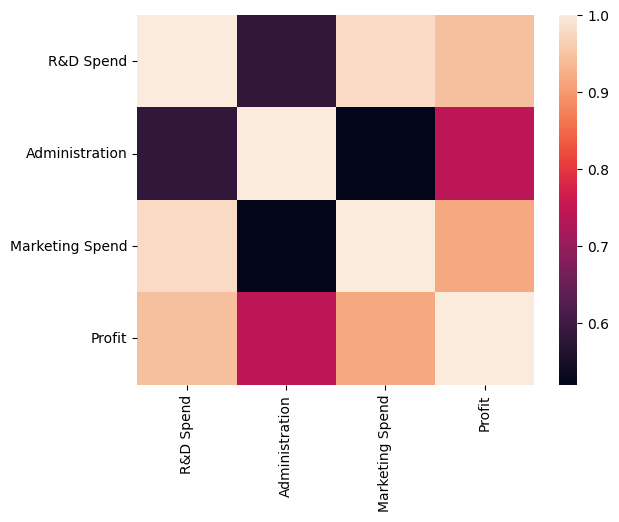

In [5]:
# Plot a heatmap to visualize the correlation matrix of numerical features
sns.heatmap(companies_num.corr())

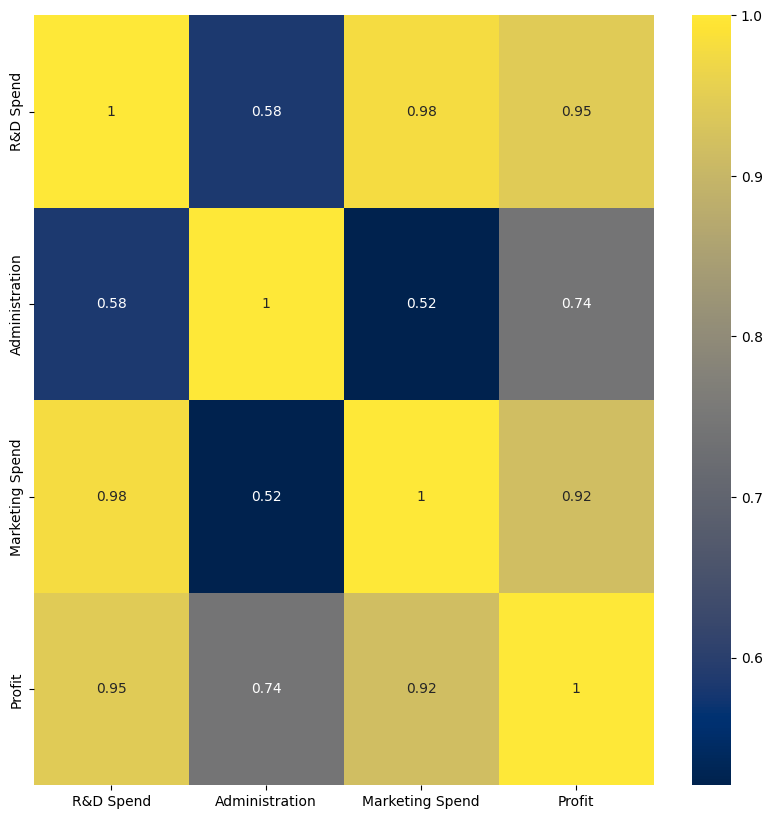

In [7]:
# Heatmap with annotations and a specific colormap for a more detailed view
plt.figure(figsize=(10,10))
sns.heatmap(companies_num.corr(), annot=True, cmap="cividis")
plt.show()

In [9]:
# Style the correlation matrix with a gradient for better readability
corr = companies_num.corr()
corr.style.background_gradient(cmap='coolwarm')

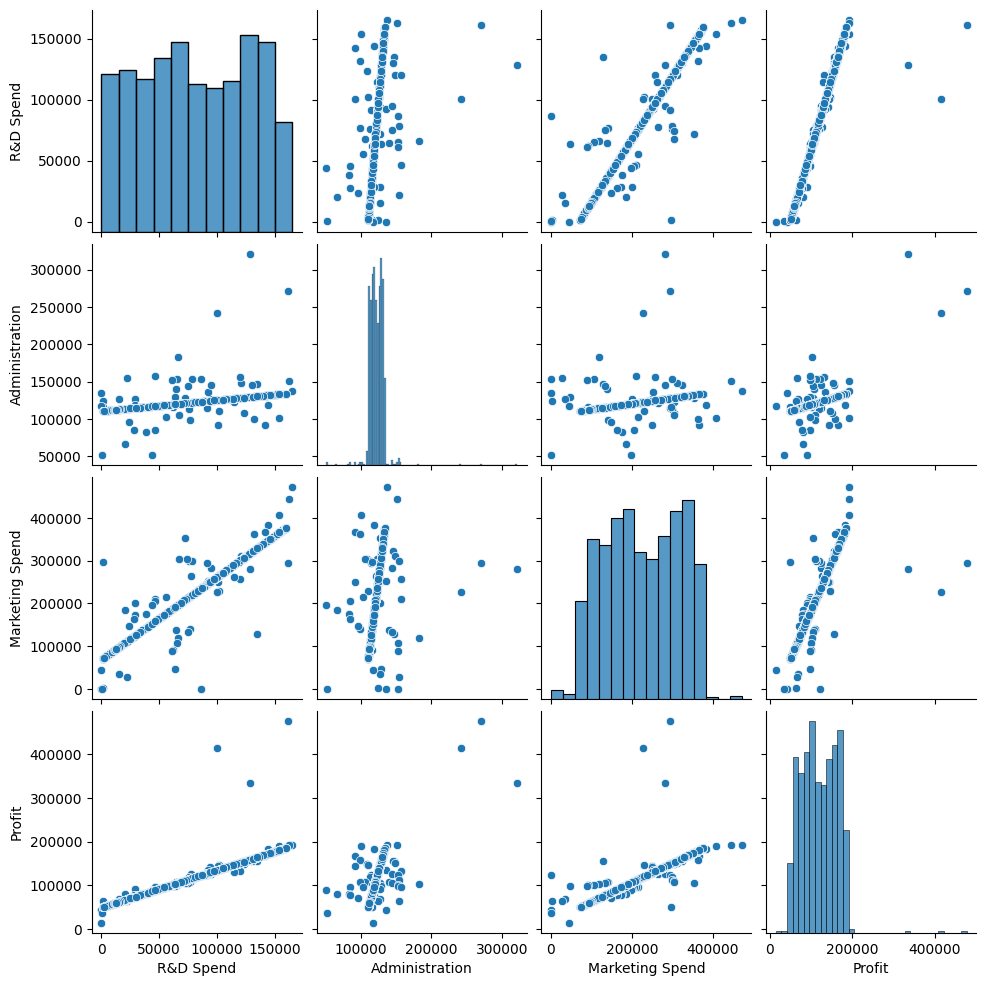

In [10]:
# Plot pairwise relationships between variables (scatterplot matrix)
sns.pairplot(companies)
plt.show()

**Extracting Independent and Dependent Variables**

In [11]:
# Target variable (dependent): 'Profit'
y = companies['Profit']

In [12]:
# Convert the categorical 'State' column into dummy variables for the model
dummy = pd.get_dummies(companies.State)
print(dummy.head())  # Check the generated dummy variables

   California  Florida  New York
0       False    False      True
1        True    False     False
2       False     True     False
3       False    False      True
4       False     True     False


In [13]:
# Combine the original dataset with the dummy variables and drop the 'State' and 'Profit' columns
X = pd.concat([companies, dummy], axis=1)
X.drop(['State'], axis=1, inplace=True)  # Drop 'State' since it's now dummies
X = X.drop(["Profit"], axis=1)  # Drop 'Profit' as it's the target variable
X.head(5)  # Preview the transformed dataset

R&D Spend  Administration  Marketing Spend  California  Florida  New York
0  165349.20       136897.80        471784.10       False    False      True
1  162597.70       151377.59        443898.53        True    False     False
2  153441.51       101145.55        407934.54       False     True     False
3  144372.41       118671.85        383199.62       False    False      True
4  142107.34        91391.77        366168.42       False     True     False

**Identify Missing Value from Dataset​**

In [14]:
# Check for missing values in the dataset
missing_counts = companies.isna().sum()
print(missing_counts)  # Output the number of missing values per column

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


**Splitting the Data into Train and Test Set**

In [15]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Fitting Multiple Linear Regression Model to Training Set**

In [16]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Predicting the Test set result**

In [17]:
# Predict the target variable (Profit) for the test set
y_pred = model.predict(X_test)

**Calculating the Coefficient and Intercept**

In [18]:
# Output the coefficients (impact of each feature) and the intercept (bias term)
print("Coefficients: ", model.coef_)

Coefficients:  [ 5.25845857e-01  8.44390881e-01  1.07574255e-01  5.26235224e+02
 -3.54301375e+02 -1.71933849e+02]


In [19]:
print(model.intercept_)

-51561.464947771135


**Perform Multiple Linear Regression Model​**

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate and print the R-squared (model accuracy) and Mean Squared Error (model performance)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared: ", r2)
print("Mean Squared Error: ", mse)

R-squared:  0.9112695892268795
Mean Squared Error:  192148061.81508115
